<a href="https://colab.research.google.com/github/arnabkumargogoi/DSL2020Project/blob/main/03_DSL_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import string
import nltk
import spacy
import gensim
from spacy import displacy
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import pos_tag
from nltk import corpus
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.probability import FreqDist
from sklearn.svm import LinearSVC
from textblob import TextBlob
from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSL Project/Amazon Bestseller Smartphones.csv', encoding="UTF-8")
reviews_df.head()

,Id,name,customer,rating,title,date,review
0,1,Apple iPhone 11,Benson k antony,5,Awesome,2020-10-21,Best product everValue for money
1,2,Apple iPhone 11,SeeRipStar,5,BEST PHONE OUT THERE!,2020-11-21,Can't accept anything more from apple! Grabbe...
2,3,Apple iPhone 11,Sushant,5,Worth Buying 😊,2020-10-19,Clicked some pictures and recorded a wide ang...
3,4,Apple iPhone 11,Sushma,1,Send me my refund.,2020-10-29,"Dose not like this , setup has not been even ..."
4,5,Apple iPhone 11,Janmejay Singh,5,iphone for ever,2020-10-21,Finally got it for the valid prise.Camera qua...


In [ ]:
reviews_df.shape

(31673, 7)

In [ ]:
# any null columns
reviews_df.isnull().sum()

Id          0
name        0
customer    1
rating      0
title       4
date        0
review      4
dtype: int64

In [ ]:
# the review column, four rows without review text, we drop the rows with the null columns
reviews_df = reviews_df.dropna()
#resetting the index
reviews_df = reviews_df.reset_index(drop=True)
reviews_df

,Id,name,customer,rating,title,date,review,brandName,product
0,1,Apple iPhone 11,Benson k antony,5,Awesome,2020-10-21,Best product everValue for money,Apple,iPhone 11
1,2,Apple iPhone 11,SeeRipStar,5,BEST PHONE OUT THERE!,2020-11-21,Can t accept anything more from apple Grabbed...,Apple,iPhone 11
2,3,Apple iPhone 11,Sushant,5,Worth Buying 😊,2020-10-19,Clicked some pictures and recorded a wide ang...,Apple,iPhone 11
3,4,Apple iPhone 11,Sushma,1,Send me my refund.,2020-10-29,Dose not like this setup has not been even co...,Apple,iPhone 11
4,5,Apple iPhone 11,Janmejay Singh,5,iphone for ever,2020-10-21,Finally got it for the valid prise Camera qua...,Apple,iPhone 11
...,...,...,...,...,...,...,...,...,...
31661,31669,Vivo Y50,Amazon Customer,1,Bad mobile,2020-09-15,Wrost performance like all china products Heat...,Vivo,Y50
31662,31670,Vivo Y50,Tanu,4,Excellent Product,2020-09-14,Y50 comes with 16 59cm 6 53 FHD iView display ...,Vivo,Y50
31663,31671,Vivo Y50,Amazon Customer,1,Yed,2020-11-28,Yes best quality control and then you should r...,Vivo,Y50
31664,31672,Vivo Y50,Harikrushn Narayan Gursal,5,मस्त है,2020-10-06,,Vivo,Y50


In [ ]:
# any null columns
reviews_df.isnull().sum()

Id           0
name         0
customer     0
rating       0
title        0
date         0
review       0
brandName    0
product      0
dtype: int64

In [ ]:
# remove all characters not number or characters
def cleanText(input_string):
    modified_string = re.sub('[^A-Za-z0-9]+', ' ', input_string)
    return(modified_string)
reviews_df['review'] = reviews_df.review.apply(cleanText)
reviews_df['review'][150]

'Brilliant design and good responsive phone I bought this for my father and he is thoroughly enjoying using it Amazon delivery was quick and product arrived in a perfect condition Obviously the battery life in Apple phoneS has been just above average and that continues for iPhone 11 too Otherwise it is a great product especially for senior citizens '

In [ ]:
# From the name we extract the brand
reviews_df['brandName'] = reviews_df['name'].str.split(' ').str[0]
reviews_df.head()

,Id,name,customer,rating,title,date,review,brandName,product
0,1,Apple iPhone 11,Benson k antony,5,Awesome,2020-10-21,Best product everValue for money,Apple,iPhone 11
1,2,Apple iPhone 11,SeeRipStar,5,BEST PHONE OUT THERE!,2020-11-21,Can t accept anything more from apple Grabbed...,Apple,iPhone 11
2,3,Apple iPhone 11,Sushant,5,Worth Buying 😊,2020-10-19,Clicked some pictures and recorded a wide ang...,Apple,iPhone 11
3,4,Apple iPhone 11,Sushma,1,Send me my refund.,2020-10-29,Dose not like this setup has not been even co...,Apple,iPhone 11
4,5,Apple iPhone 11,Janmejay Singh,5,iphone for ever,2020-10-21,Finally got it for the valid prise Camera qua...,Apple,iPhone 11


In [ ]:
reviews_df['brandName'].value_counts()

OnePlus      10175
Redmi         7913
Samsung       6789
Oppo          3017
Apple         1980
Vivo          1416
Panasonic      376
Name: brandName, dtype: int64

In [ ]:
reviews_df['brandName'] = reviews_df['brandName'].str.title()
reviews_df.brandName.unique()

array(['Apple', 'Oneplus', 'Oppo', 'Panasonic', 'Redmi', 'Samsung',
       'Vivo'], dtype=object)

In [ ]:
# Extracting the product from the name column
products = []
for value in reviews_df['name']:
    indx = len(value.split(' ')[0])+1
    products.append(value[indx:])
reviews_df['product'] = products
reviews_df['product'].unique()

array(['iPhone 11', 'iPhone 7', '7T', '7T PRO', '8', '8 Pro', '8T 5G',
       'Nord 5G', 'A12', 'A31', 'A5 2020', 'A52', 'A53', 'F17',
       'Eluga i7', '8A Dual', '9', '9 Prime', '9A', 'Note 8', 'Note 9',
       'Note 9 Pro', 'Note 9 Pro Max', 'Galaxy M01', 'Galaxy M01 Core',
       'Galaxy M11', 'Galaxy M21', 'Galaxy M31', 'Galaxy M31s',
       'Galaxy M51', 'V19', 'V20 Pro 5G', 'Y50'], dtype=object)

In [ ]:
reviews_df.head()

,Id,name,customer,rating,title,date,review,brandName,product
0,1,Apple iPhone 11,Benson k antony,5,Awesome,2020-10-21,Best product everValue for money,Apple,iPhone 11
1,2,Apple iPhone 11,SeeRipStar,5,BEST PHONE OUT THERE!,2020-11-21,Can t accept anything more from apple Grabbed...,Apple,iPhone 11
2,3,Apple iPhone 11,Sushant,5,Worth Buying 😊,2020-10-19,Clicked some pictures and recorded a wide ang...,Apple,iPhone 11
3,4,Apple iPhone 11,Sushma,1,Send me my refund.,2020-10-29,Dose not like this setup has not been even co...,Apple,iPhone 11
4,5,Apple iPhone 11,Janmejay Singh,5,iphone for ever,2020-10-21,Finally got it for the valid prise Camera qua...,Apple,iPhone 11


Text analysis with NLTK and Vader Sentiment analyzer



In [ ]:
#converting to lower case
reviews_df['clean_review_text']=reviews_df['review'].str.lower()

In [ ]:
#removing punctuations
reviews_df['clean_review_text']=reviews_df['clean_review_text'].str.translate(str.maketrans('','',string.punctuation))

In [ ]:
stopWords=stopwords.words('english')
def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt
reviews_df['clean_review_text'] = [removeStopWords(stopWords,x) for x in reviews_df['clean_review_text']]

In [ ]:
#splitting text into words
tokenList=[]
for indx in range(len(reviews_df)):
       token=word_tokenize(reviews_df['clean_review_text'][indx])
       tokenList.append(token)
reviews_df['review_tokens'] = tokenList
reviews_df.head()

,Id,name,customer,rating,title,date,review,brandName,product,clean_review_text,review_tokens
0,1,Apple iPhone 11,Benson k antony,5,Awesome,2020-10-21,Best product everValue for money,Apple,iPhone 11,best product evervalue money,"[best, product, evervalue, money]"
1,2,Apple iPhone 11,SeeRipStar,5,BEST PHONE OUT THERE!,2020-11-21,Can t accept anything more from apple Grabbed...,Apple,iPhone 11,accept anything apple grabbed beauty 45000 gre...,"[accept, anything, apple, grabbed, beauty, 450..."
2,3,Apple iPhone 11,Sushant,5,Worth Buying 😊,2020-10-19,Clicked some pictures and recorded a wide ang...,Apple,iPhone 11,clicked pictures recorded wide angle video may...,"[clicked, pictures, recorded, wide, angle, vid..."
3,4,Apple iPhone 11,Sushma,1,Send me my refund.,2020-10-29,Dose not like this setup has not been even co...,Apple,iPhone 11,dose like setup even completed started hang ha...,"[dose, like, setup, even, completed, started, ..."
4,5,Apple iPhone 11,Janmejay Singh,5,iphone for ever,2020-10-21,Finally got it for the valid prise Camera qua...,Apple,iPhone 11,finally got valid prise camera quality excelle...,"[finally, got, valid, prise, camera, quality, ..."


In [ ]:
#splitting text into words
tokenList=[]
for indx in range(len(reviews_df)):
       token=word_tokenize(reviews_df['clean_review_text'][indx])
       tokenList.append(token)
reviews_df['review_tokens'] = tokenList
reviews_df.head()

,Id,name,customer,rating,title,date,review,brandName,product,clean_review_text,review_tokens
0,1,Apple iPhone 11,Benson k antony,5,Awesome,2020-10-21,Best product everValue for money,Apple,iPhone 11,best product evervalue money,"[best, product, evervalue, money]"
1,2,Apple iPhone 11,SeeRipStar,5,BEST PHONE OUT THERE!,2020-11-21,Can t accept anything more from apple Grabbed...,Apple,iPhone 11,accept anything apple grabbed beauty 45000 gre...,"[accept, anything, apple, grabbed, beauty, 450..."
2,3,Apple iPhone 11,Sushant,5,Worth Buying 😊,2020-10-19,Clicked some pictures and recorded a wide ang...,Apple,iPhone 11,clicked pictures recorded wide angle video may...,"[clicked, pictures, recorded, wide, angle, vid..."
3,4,Apple iPhone 11,Sushma,1,Send me my refund.,2020-10-29,Dose not like this setup has not been even co...,Apple,iPhone 11,dose like setup even completed started hang ha...,"[dose, like, setup, even, completed, started, ..."
4,5,Apple iPhone 11,Janmejay Singh,5,iphone for ever,2020-10-21,Finally got it for the valid prise Camera qua...,Apple,iPhone 11,finally got valid prise camera quality excelle...,"[finally, got, valid, prise, camera, quality, ..."


In [ ]:
nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores=[]
sentiment_score_flag = []
for text in reviews_df['clean_review_text']:
        sentimentResults = sentiment_model.polarity_scores(text)
        sentiment_score = sentimentResults["compound"]
        #print(sentimentResults)
        #The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.
        sentiment_scores.append(sentiment_score)
        # marking the sentiments as positive, negative and neutral 
        if sentimentResults['compound'] >= 0.05 : 
            sentiment_score_flag.append('positive')
  
        elif sentimentResults['compound'] <= - 0.05 : 
            sentiment_score_flag.append('negative')
  
        else : 
            sentiment_score_flag.append('neutral')
            
reviews_df['scores']=sentiment_scores
reviews_df['scoreStatus'] = sentiment_score_flag

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
reviews_df.head()

,Id,name,customer,rating,title,date,review,brandName,product,clean_review_text,review_tokens,scores,scoreStatus
0,1,Apple iPhone 11,Benson k antony,5,Awesome,2020-10-21,Best product everValue for money,Apple,iPhone 11,best product evervalue money,"[best, product, evervalue, money]",0.6369,positive
1,2,Apple iPhone 11,SeeRipStar,5,BEST PHONE OUT THERE!,2020-11-21,Can t accept anything more from apple Grabbed...,Apple,iPhone 11,accept anything apple grabbed beauty 45000 gre...,"[accept, anything, apple, grabbed, beauty, 450...",0.9628,positive
2,3,Apple iPhone 11,Sushant,5,Worth Buying 😊,2020-10-19,Clicked some pictures and recorded a wide ang...,Apple,iPhone 11,clicked pictures recorded wide angle video may...,"[clicked, pictures, recorded, wide, angle, vid...",0.9413,positive
3,4,Apple iPhone 11,Sushma,1,Send me my refund.,2020-10-29,Dose not like this setup has not been even co...,Apple,iPhone 11,dose like setup even completed started hang ha...,"[dose, like, setup, even, completed, started, ...",0.6369,positive
4,5,Apple iPhone 11,Janmejay Singh,5,iphone for ever,2020-10-21,Finally got it for the valid prise Camera qua...,Apple,iPhone 11,finally got valid prise camera quality excelle...,"[finally, got, valid, prise, camera, quality, ...",0.7964,positive


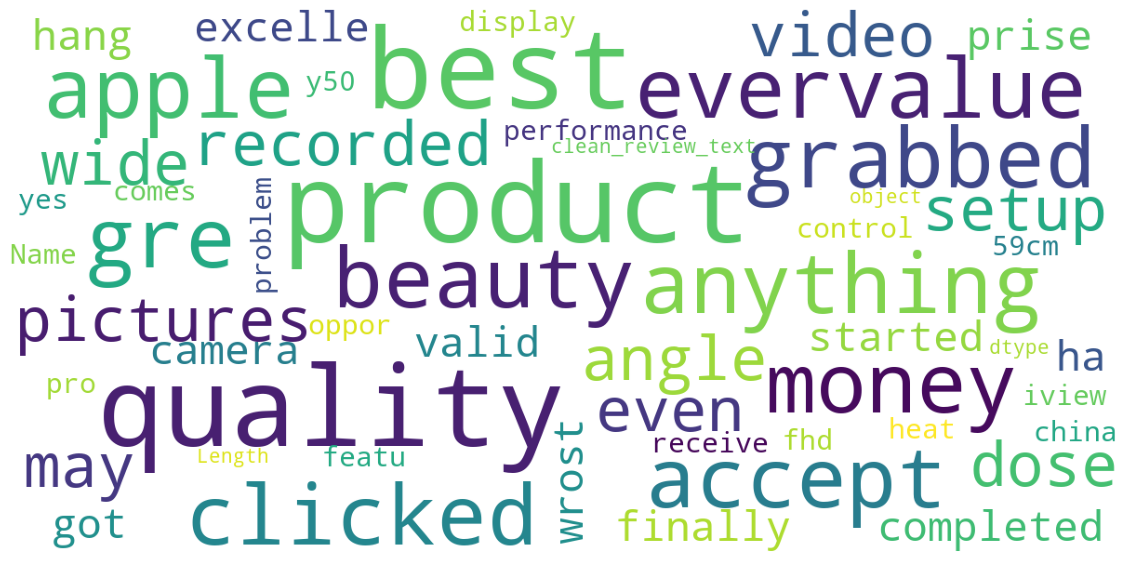

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["clean_review_text"])

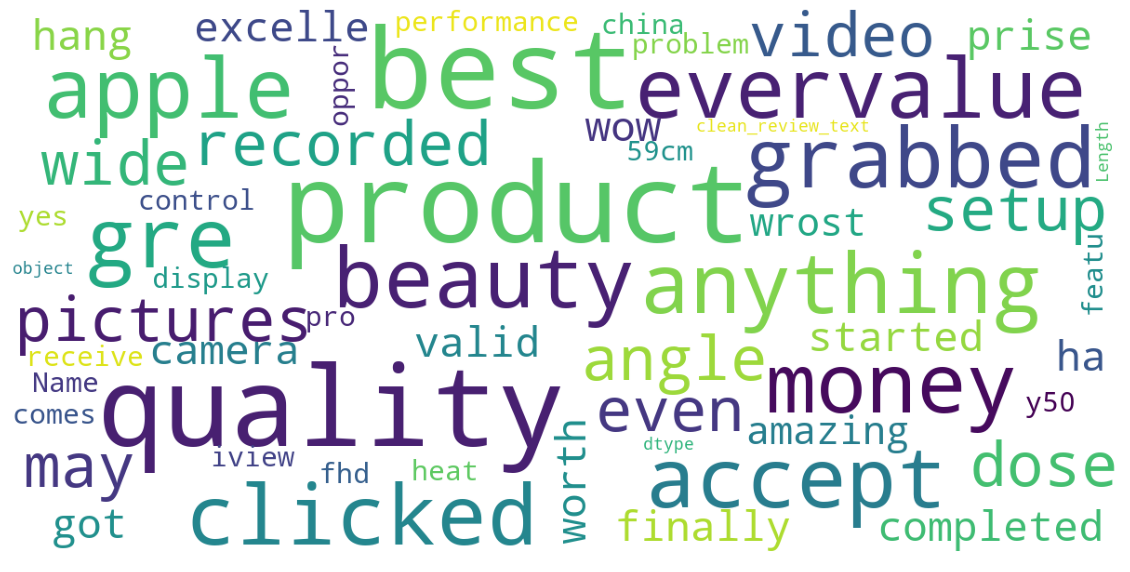

In [ ]:
# print wordcloud
positiveReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "positive"]
show_wordcloud(positiveReviews_df["clean_review_text"])

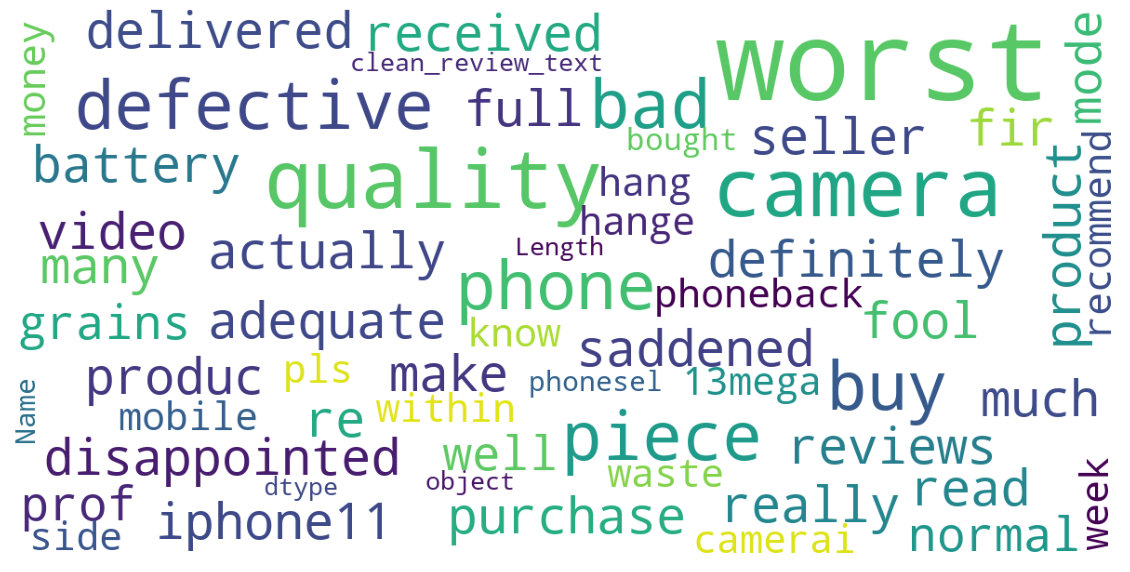

In [ ]:
## print wordcloud
negativeReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "negative"]
show_wordcloud(negativeReviews_df["clean_review_text"])

In [ ]:
features = CountVectorizer()
features.fit(reviews_df["clean_review_text"])
print(len(features.vocabulary_))
print(features.vocabulary_)

36517
{'best': 6303, 'product': 26152, 'evervalue': 12935, 'money': 21594, 'accept': 3378, 'anything': 4532, 'apple': 4627, 'grabbed': 15853, 'beauty': 6125, '45000': 1785, 'great': 15937, 'indian': 17703, 'festival': 14034, 'worth': 36096, 'every': 12936, 'single': 30248, 'penny': 24270, 'paid': 23977, 'go': 15490, 'blindly': 6680, 'device': 11055, 'segment': 29500, 'clicked': 8878, 'pictures': 24964, 'recorded': 27600, 'wide': 35765, 'angle': 4429, 'video': 34998, 'may': 20722, 'good': 15528, 'amazon': 4186, 'compressed': 9363, 'nothing': 22619, 'beat': 6096, 'iphone': 18176, 'camera': 7654, 'bought': 6961, 'iphone11': 18177, 'sale': 28848, 'amazing': 4128, 'price': 25744, 'say': 29101, 'phone': 24600, 'everything': 12953, 'prices': 25817, 'delivery': 10776, 'time': 33163, 'day': 10390, 'packaging': 23945, 'dose': 11905, 'like': 19668, 'setup': 29818, 'even': 12892, 'completed': 9318, 'started': 31469, 'hang': 16349, 'happy': 16416, 'cancel': 7879, 'order': 23528, 'finally': 14128, '

In [ ]:
bagofWords = features.transform(reviews_df["clean_review_text"])
print(bagofWords)

  (0, 6303)	1
  (0, 12935)	1
  (0, 21594)	1
  (0, 26152)	1
  (1, 1785)	1
  (1, 3378)	1
  (1, 4532)	1
  (1, 4627)	1
  (1, 6125)	1
  (1, 6303)	1
  (1, 6680)	1
  (1, 11055)	1
  (1, 12936)	1
  (1, 14034)	1
  (1, 15490)	1
  (1, 15853)	1
  (1, 15937)	1
  (1, 17703)	1
  (1, 23977)	1
  (1, 24270)	1
  (1, 29500)	1
  (1, 30248)	1
  (1, 36096)	1
  (2, 4128)	1
  (2, 4186)	1
  :	:
  (31662, 29256)	1
  (31662, 30051)	1
  (31662, 30293)	1
  (31662, 30701)	1
  (31662, 31535)	1
  (31662, 31600)	1
  (31662, 33721)	1
  (31662, 33872)	1
  (31662, 34059)	1
  (31662, 34120)	1
  (31662, 35062)	1
  (31662, 35119)	1
  (31662, 35136)	1
  (31662, 35775)	1
  (31662, 35939)	1
  (31662, 36285)	5
  (31663, 6303)	1
  (31663, 9748)	1
  (31663, 23427)	1
  (31663, 25940)	1
  (31663, 26783)	1
  (31663, 27491)	1
  (31663, 36341)	1
  (31665, 605)	1
  (31665, 734)	1


In [ ]:
print(bagofWords.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(features.get_feature_names())

['00', '000', '0000000', '000000000000000', '000000not', '000but', '000inr', '000mah', '000please', '000rsbecause', '002906', '004', '00am', '00amazon', '00hrs', '00it', '00mm', '00mobistyle', '00one', '00pm', '00popio', '00redmi', '00samsung', '00show', '01', '010', '02', '020', '020mah', '02days', '02nd', '03', '03jun2020visited', '04', '04th', '05', '053', '058', '05th', '06', '06gb', '06th', '07', '079', '07oct2020', '08', '080p', '09', '09oct', '09th', '0all', '0battery', '0camera', '0cameraphotos', '0f', '0finger', '0games', '0gb', '0ghz', '0ghzoverall', '0hone', '0i', '0latest', '0lus', '0memory', '0other', '0perform', '0performance', '0phone', '0r', '0s', '0samsung', '0star', '0stars', '0support', '0the', '0therthan', '0this', '0time', '0to', '0to100', '0verall', '0videos', '10', '100', '1000', '10000', '100000', '1000000', '100001', '10000if', '10000rs', '10000sorry', '10000the', '1000cc', '1000mah', '1000mhz', '1000nits', '1000rs', '1000times', '1002', '1003', '10078', '100an

In [ ]:
df = pd.concat([positiveReviews_df,negativeReviews_df])
df = df[["clean_review_text","scoreStatus"]]
df['scoreStatus'] = (df['scoreStatus'] == 'positive')*1
X = df["clean_review_text"]
y = df["scoreStatus"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train = features.fit_transform(X_train)
X_test = features.transform(X_test)

In [ ]:
#k fold cross validation with k=5
scores = cross_val_score(LogisticRegression(),X_train,y_train,cv=5)
print(np.mean(scores))

0.9486219516866823


In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9925489432161293
0.9529598909214861


In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[1427,  239],
       [ 175, 6960]])

In [ ]:
text = "the product great"
model.predict(features.transform([text]))[0]

1

In [ ]:
text = "bad"
model.predict(features.transform([text]))[0]

0

In [ ]:
text = "sucks"
model.predict(features.transform([text]))[0]

0

In [ ]:
text = "very bad"
model.predict(features.transform([text]))[0]

0

In [ ]:
text = "not good"
model.predict(features.transform([text]))[0]

1

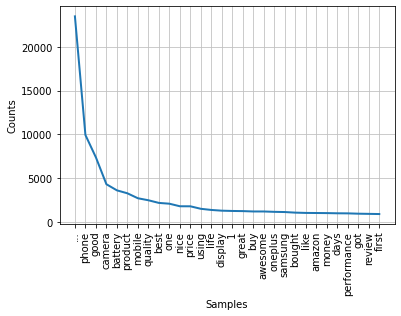

In [ ]:
tokenized_word=word_tokenize((reviews_df['clean_review_text'].to_string()))
#Frequency Distribution
fdist = FreqDist(tokenized_word)
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

Text Analytics with spacy

In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
text = reviews_df['review'][120]
doc=nlp(text)
type(doc)
print(doc)

Been using the 11 for a Month now Love the phone so for except for the display And few hiccups in software being coming from Android It s good deal for me to get 128GB for 53k 


In [ ]:
#Tokens
for token in doc:
    print(token.text)

Been
using
the
11
for
a
Month
now
Love
the
phone
so
for
except
for
the
display
And
few
hiccups
in
software
being
coming
from
Android
It
s
good
deal
for
me
to
get
128
GB
for
53k


In [ ]:
#Stopwords
stopwords=spacy.lang.en.stop_words.STOP_WORDS
stopWords = list(stopwords)
len(stopWords)

326

In [ ]:
for token in doc:
    if token.is_stop == False:
        print(token)

11
Month
Love
phone
display
hiccups
software
coming
Android
s
good
deal
128
GB
53k


In [ ]:
print(len(doc))
doc2=[]
for token in doc:
    if not token.is_stop:
        doc2.append(token)
print(len(doc2))

38
15


In [ ]:
#lemmatization
for review_text in doc:
    print(review_text.text,review_text.lemma_)

Been be
using use
the the
11 11
for for
a a
Month Month
now now
Love love
the the
phone phone
so so
for for
except except
for for
the the
display display
And and
few few
hiccups hiccup
in in
software software
being be
coming come
from from
Android Android
It -PRON-
s s
good good
deal deal
for for
me -PRON-
to to
get get
128 128
GB gb
for for
53k 53k


In [ ]:
#POS
for token in doc:
   print(token,token.tag_,token.pos_,spacy.explain(token.tag_))

Been VBN AUX verb, past participle
using VBG VERB verb, gerund or present participle
the DT DET determiner
11 CD NUM cardinal number
for IN ADP conjunction, subordinating or preposition
a DT DET determiner
Month NNP PROPN noun, proper singular
now RB ADV adverb
Love VBP VERB verb, non-3rd person singular present
the DT DET determiner
phone NN NOUN noun, singular or mass
so RB ADV adverb
for IN ADP conjunction, subordinating or preposition
except IN SCONJ conjunction, subordinating or preposition
for IN ADP conjunction, subordinating or preposition
the DT DET determiner
display NN NOUN noun, singular or mass
And CC CCONJ conjunction, coordinating
few JJ ADJ adjective
hiccups NNS NOUN noun, plural
in IN ADP conjunction, subordinating or preposition
software NN NOUN noun, singular or mass
being VBG AUX verb, gerund or present participle
coming VBG VERB verb, gerund or present participle
from IN ADP conjunction, subordinating or preposition
Android NNP PROPN noun, proper singular
It PRP PR

In [ ]:
displacy.render(doc,style='dep',jupyter=True,options={'distance':90})

In [ ]:
for entity in doc.ents:
    print(entity.text,'---->',entity.label_)
displacy.render(doc,style='ent',jupyter=True)

11 ----> CARDINAL
a Month ----> DATE
Android ----> ORG
128 ----> CARDINAL
53k ----> CARDINAL


In [ ]:
#word vectors and similarity
#large pre trained model
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 4.0MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180945 sha256=54852d17842e770d354cb4f4e01a6c9c5c9fed30b76930824439c614ffcde4ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-appa23x7/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import en_core_web_lg
nlp = en_core_web_lg.load()
doc=nlp(text)
for token in doc:
    print(token.text,'---->',token.has_vector)

Been ----> True
using ----> True
the ----> True
11 ----> True
for ----> True
a ----> True
Month ----> True
now ----> True
Love ----> True
the ----> True
phone ----> True
so ----> True
for ----> True
except ----> True
for ----> True
the ----> True
display ----> True
And ----> True
few ----> True
hiccups ----> True
in ----> True
software ----> True
being ----> True
coming ----> True
from ----> True
Android ----> True
It ----> True
s ----> True
good ----> True
deal ----> True
for ----> True
me ----> True
to ----> True
get ----> True
128 ----> True
GB ----> True
for ----> True
53k ----> True


In [ ]:
for token in doc:
    print(token.text,'',token.vector_norm)

Been  5.2458506
using  5.685473
the  4.70935
11  5.34623
for  4.8435082
a  5.306696
Month  5.837748
now  4.8410244
Love  6.04035
the  4.70935
phone  7.250555
so  5.0674334
for  4.8435082
except  4.744734
for  4.8435082
the  4.70935
display  6.533257
And  4.6577983
few  5.220241
hiccups  6.470069
in  5.0929856
software  7.357108
being  5.1678977
coming  4.962811
from  5.093107
Android  7.218946
It  4.9409766
s  5.3491664
good  5.280565
deal  5.520077
for  4.8435082
me  5.75488
to  4.74484
get  5.107025
128  5.7977767
GB  7.1593857
for  4.8435082
53k  6.85485


In [ ]:
#similarity score
text="good"
text1="bad"
doc=nlp(text)
doc1=nlp(text1)
doc.similarity(doc1)

0.7355090324289566

In [ ]:
#similarity score
text="excellent"
text1="good"
doc=nlp(text)
doc1=nlp(text1)
doc.similarity(doc1)

0.777407893397578

In [ ]:
#similarity score
text="sucks"
text1="bad"
doc=nlp(text)
doc1=nlp(text1)
doc.similarity(doc1)

0.5329751363061155

In [ ]:
df = pd.concat([positiveReviews_df,negativeReviews_df])
df = df[["clean_review_text","scoreStatus"]]
df['scoreStatus'] = (df['scoreStatus'] == 'positive')*1

In [ ]:
#Tokenization
punct = string.punctuation
print(punct)
def cleanText(sent):
    doc = nlp(sent)
    tokens = []
    for token in doc:
        if token.lemma != "-PRON-":
            tokens.append(token.lemma_.lower().strip())
        else:
            tokens.append(token.lemma_)
            
    cleanTokens = []
    for token in tokens:
        if token not in stopWords and token not in punct:
            cleanTokens.append(token)
    return cleanTokens

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
#TFIDF
tfidf = TfidfVectorizer(tokenizer = cleanText)
classifier = LinearSVC()
X = df["clean_review_text"]
y = df["scoreStatus"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((20534,), (8801,))

In [ ]:
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1666
           1       0.96      0.97      0.97      7135

    accuracy                           0.95      8801
   macro avg       0.92      0.90      0.91      8801
weighted avg       0.94      0.95      0.94      8801



In [ ]:
confusion_matrix(y_test,y_pred)

array([[1363,  303],
       [ 181, 6954]])

With TextBlob

In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
reviews_df["polarity"] = reviews_df["review"].apply(pol)
reviews_df["subjectivity"] = reviews_df["review"].apply(sub)

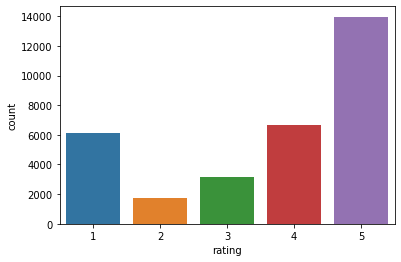

In [ ]:
#distribution of rating
sns.countplot(x='rating', data=reviews_df)

In [ ]:
reviews_df.head()

,Id,name,customer,rating,title,date,review,brandName,product,clean_review_text,review_tokens,scores,scoreStatus,polarity,subjectivity
0,1,Apple iPhone 11,Benson k antony,5,Awesome,2020-10-21,Best product everValue for money,Apple,iPhone 11,best product evervalue money,"[best, product, evervalue, money]",0.6369,positive,1.000000,0.300000
1,2,Apple iPhone 11,SeeRipStar,5,BEST PHONE OUT THERE!,2020-11-21,Can t accept anything more from apple Grabbed...,Apple,iPhone 11,accept anything apple grabbed beauty 45000 gre...,"[accept, anything, apple, grabbed, beauty, 450...",0.9628,positive,0.271939,0.415136
2,3,Apple iPhone 11,Sushant,5,Worth Buying 😊,2020-10-19,Clicked some pictures and recorded a wide ang...,Apple,iPhone 11,clicked pictures recorded wide angle video may...,"[clicked, pictures, recorded, wide, angle, vid...",0.9413,positive,0.550000,0.550000
3,4,Apple iPhone 11,Sushma,1,Send me my refund.,2020-10-29,Dose not like this setup has not been even co...,Apple,iPhone 11,dose like setup even completed started hang ha...,"[dose, like, setup, even, completed, started, ...",0.6369,positive,-0.400000,1.000000
4,5,Apple iPhone 11,Janmejay Singh,5,iphone for ever,2020-10-21,Finally got it for the valid prise Camera qua...,Apple,iPhone 11,finally got valid prise camera quality excelle...,"[finally, got, valid, prise, camera, quality, ...",0.7964,positive,0.500000,0.600000


In [ ]:
print("negative reviews")
most_negative = reviews_df[reviews_df.polarity == -1].review.head()
print(most_negative)
print("positive reviews")
most_positive = reviews_df[reviews_df.polarity == 1].review.head()
print(most_positive)

negative reviews
535     It is defective phone camera not working on is...
770     Screen was damaged means scratched no support ...
1379    Got a defective try to return it but not allow...
1702    One of the worst products I ve received It s t...
1755    Please don t buy iphone 7 in Amazon it s worst...
Name: review, dtype: object
positive reviews
0                       Best product everValue for money
9       iphone 11 is the perfect iphone best mixture ...
95                                               Awesome
125                          best color among iphone11s 
127                     Best product and value for money
Name: review, dtype: object


Text analysis with gensim and word2vec

In [ ]:
sentences = reviews_df['review_tokens'][1:10]
sentences

1    [accept, anything, apple, grabbed, beauty, 450...
2    [clicked, pictures, recorded, wide, angle, vid...
3    [dose, like, setup, even, completed, started, ...
4    [finally, got, valid, prise, camera, quality, ...
5    [happy, apple, customer, buying, apple, produc...
6    [using, iphone, 6s, needed, upgrade, decided, ...
7    [product, 1, iphone, 112, adapter3, lightening...
8    [inside, box, charging, adapter, well, earpods...
9    [iphone, 11, perfect, iphone, best, mixture, p...
Name: review_tokens, dtype: object

In [ ]:
#train model
model = Word2Vec(sentences, min_count=1)
print(model)

Word2Vec(vocab=164, size=100, alpha=0.025)


In [ ]:
#vocab
words=list(model.wv.vocab)
print(words)

['accept', 'anything', 'apple', 'grabbed', 'beauty', '45000', 'great', 'indian', 'festival', 'worth', 'every', 'single', 'penny', 'paid', 'go', 'blindly', 'device', 'best', 'segment', 'clicked', 'pictures', 'recorded', 'wide', 'angle', 'video', 'may', 'good', 'amazon', 'compressed', 'nothing', 'beat', 'iphone', 'camera', 'bought', '2', 'iphone11', 'sale', 'amazing', 'price', 'say', 'phone', 'everything', 'prices', 'delivery', 'time', '1', 'day', 'packaging', 'dose', 'like', 'setup', 'even', 'completed', 'started', 'hang', 'happy', 'cancel', 'order', 'finally', 'got', 'valid', 'prise', 'quality', 'excellentmain', 'point', 'privacy', 'applerest', 'batter', 'could', 'much', 'better', 'guess', 'look', 'work', 'power', 'area', 'customer', 'buying', 'product', 'always', 'since', '2019', 'till', 'satisfied', 'services', 'imac', 'last', 'year', 'works', 'absolutely', 'fine', 'android', 'moved', 'onto', 'really', 'loved', 'experience', '7', 'recently', '11', 'thanks', 'alot', 'delivering', 'ori

In [ ]:
reviewsText = reviews_df.clean_review_text.values
reviewsVec = [nltk.word_tokenize(review) for review in reviewsText]
len(reviewsVec)

31666

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('apple')

[('company', 0.8427819013595581),
 ('xiaomi', 0.8306086659431458),
 ('machinery', 0.825640082359314),
 ('reassured', 0.816478431224823),
 ('anutanu', 0.8153131008148193),
 ('trusted', 0.8148704767227173),
 ('mi', 0.8128964900970459),
 ('liars', 0.807183027267456),
 ('loyal', 0.8038602471351624),
 ('customers', 0.7956843376159668)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('packaging')

[('packing', 0.9234421849250793),
 ('shipping', 0.8403258323669434),
 ('rkllp', 0.8144341111183167),
 ('partner', 0.8003416061401367),
 ('boy', 0.7966821193695068),
 ('sealed', 0.7949597835540771),
 ('delivering', 0.7940627336502075),
 ('frameless', 0.7850030660629272),
 ('stpl', 0.7849909067153931),
 ('5amazon', 0.7790861129760742)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('oneplus')

[('op', 0.8511183261871338),
 ('samsung', 0.8278794288635254),
 ('there5g', 0.7894902229309082),
 ('plus', 0.7872647643089294),
 ('mi', 0.783598780632019),
 ('redmi', 0.783510684967041),
 ('apple', 0.7514835596084595),
 ('upgrade', 0.737759530544281),
 ('oppo', 0.7317259311676025),
 ('series', 0.7276742458343506)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('camera')

[('cam', 0.8846611380577087),
 ('cameras', 0.8609218597412109),
 ('rear', 0.8177517652511597),
 ('camara', 0.8125900030136108),
 ('picture', 0.7947330474853516),
 ('20mp', 0.7698582410812378),
 ('selfy', 0.7679457664489746),
 ('selfie', 0.7464985847473145),
 ('displaycons1', 0.7424882650375366),
 ('64mp', 0.7406740784645081)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('samsung')

[('xiaomi', 0.8514150381088257),
 ('mi', 0.8195679187774658),
 ('series', 0.8052959442138672),
 ('oneplus', 0.7985094785690308),
 ('motorolla', 0.7947807312011719),
 ('apple', 0.7935867309570312),
 ('designxiaomi', 0.7866748571395874),
 ('motorola', 0.7864965200424194),
 ('oppo', 0.7628682851791382),
 ('vivo', 0.7534562945365906)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('deal')

[('1300', 0.8136439919471741),
 ('13000', 0.8054893016815186),
 ('7999', 0.7999066114425659),
 ('10000', 0.7996455430984497),
 ('indian', 0.7902902960777283),
 ('21500', 0.7864016890525818),
 ('bargain', 0.7844116687774658),
 ('festival', 0.7839363813400269),
 ('12700', 0.7828549146652222),
 ('9999', 0.782375693321228)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('defective')

[('faulty', 0.9646938443183899),
 ('damaged', 0.9478670358657837),
 ('defected', 0.9219796061515808),
 ('defect', 0.8954492807388306),
 ('requested', 0.8859760761260986),
 ('replaced', 0.8820565342903137),
 ('returned', 0.8811244964599609),
 ('sent', 0.8761574029922485),
 ('picked', 0.8586994409561157),
 ('dead', 0.8504619002342224)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('battery')

[('bettery', 0.8067572116851807),
 ('batter', 0.7953985333442688),
 ('classbattery', 0.7562928199768066),
 ('quiclky', 0.7253261804580688),
 ('phonelong', 0.7243938446044922),
 ('5020', 0.7240535616874695),
 ('luncher', 0.7114517688751221),
 ('batttery', 0.7044500708580017),
 ('exhausts', 0.6972877979278564),
 ('amazingi', 0.6959736347198486)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('quality')

[('clarity', 0.7979995012283325),
 ('bakupexcellent', 0.7276735305786133),
 ('badspecial', 0.6993603706359863),
 ('ok', 0.69309401512146),
 ('pictues', 0.6792596578598022),
 ('average', 0.6721118092536926),
 ('lookconslot', 0.6681263446807861),
 ('mobile3', 0.6648330688476562),
 ('superbrate', 0.6629285216331482),
 ('0000000', 0.6599687337875366)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('recommend')

[('recommended', 0.8817176818847656),
 ('suggest', 0.8813060522079468),
 ('unnotice', 0.8199928998947144),
 ('cld', 0.8129383325576782),
 ('else', 0.8120976686477661),
 ('definitely', 0.8020837306976318),
 ('anyone', 0.8005634546279907),
 ('say', 0.7864153385162354),
 ('sugggest', 0.7846298813819885),
 ('consider', 0.7845818996429443)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('discount')

[('hdfc', 0.9596805572509766),
 ('500', 0.95299232006073),
 ('discounts', 0.9300386905670166),
 ('offer', 0.9290621280670166),
 ('1500', 0.9267088770866394),
 ('debit', 0.9156883955001831),
 ('credit', 0.9103200435638428),
 ('emi', 0.908906102180481),
 ('cashback', 0.9007534980773926),
 ('600', 0.8978833556175232)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('flipkart')

[('cheating', 0.9255399703979492),
 ('shop', 0.9104970097541809),
 ('portal', 0.9103248119354248),
 ('american', 0.9043139219284058),
 ('fooling', 0.9026511907577515),
 ('strategy', 0.9019997715950012),
 ('stores', 0.8984902501106262),
 ('thanku', 0.898440420627594),
 ('marketing', 0.895793080329895),
 ('fool', 0.8932040929794312)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('amazon')

[('seller', 0.8886510133743286),
 ('amazone', 0.8585983514785767),
 ('amzon', 0.8417050838470459),
 ('agent', 0.8253409266471863),
 ('team', 0.81956547498703),
 ('excellentfirst', 0.8190309405326843),
 ('darshita', 0.8135387301445007),
 ('arnab', 0.8125324249267578),
 ('expedited', 0.8120881915092468),
 ('behaviour', 0.8084404468536377)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('sale')

[('festival', 0.9314939379692078),
 ('maid', 0.8834912776947021),
 ('diwali', 0.874427080154419),
 ('ordered', 0.8655676245689392),
 ('gift', 0.8557988405227661),
 ('discount', 0.8511460423469543),
 ('9th', 0.8491923213005066),
 ('finally', 0.845089852809906),
 ('addt', 0.8419834971427917),
 ('offer', 0.8409298658370972)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('xiaomi')

[('samsung', 0.8806882500648499),
 ('mi', 0.8629517555236816),
 ('apple', 0.8604547381401062),
 ('motorola', 0.8595721125602722),
 ('brands', 0.8573890328407288),
 ('chineese', 0.852869987487793),
 ('companies', 0.8519120812416077),
 ('chinese', 0.8493987917900085),
 ('devices', 0.8475520610809326),
 ('unlike', 0.8448120355606079)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('redmi')

[('mi', 0.8722912073135376),
 ('vivo', 0.8596745729446411),
 ('op', 0.8463001251220703),
 ('k8', 0.8236477375030518),
 ('series', 0.8228045105934143),
 ('asus', 0.8169005513191223),
 ('proi', 0.8153843283653259),
 ('realme', 0.8114262223243713),
 ('pro', 0.808538556098938),
 ('note', 0.8011542558670044)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('mi')

[('xiaomi', 0.8716574311256409),
 ('samsung', 0.8469136357307434),
 ('motorola', 0.8452613353729248),
 ('redmi', 0.8452154994010925),
 ('oppo', 0.8410114049911499),
 ('apple', 0.8331078886985779),
 ('xiomi', 0.8271645903587341),
 ('oneplus', 0.8061901330947876),
 ('vivo', 0.804414689540863),
 ('honor', 0.7959699630737305)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('chinese')

[('compete', 0.8676280379295349),
 ('chineese', 0.8675026893615723),
 ('brands', 0.856163740158081),
 ('grasped', 0.8547549843788147),
 ('companies', 0.8496538400650024),
 ('taiwanese', 0.8459876179695129),
 ('cheaper', 0.8368141055107117),
 ('xiaomi', 0.8343048095703125),
 ('expensive', 0.8236737251281738),
 ('choose', 0.82207190990448)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('china')

[('india', 0.9295098185539246),
 ('assembled', 0.9196622371673584),
 ('indi', 0.9083741903305054),
 ('chaina', 0.905722439289093),
 ('manufactured', 0.8976351022720337),
 ('label', 0.8907914757728577),
 ('origin', 0.8809536695480347),
 ('amozan', 0.8715391159057617),
 ('made', 0.8647841215133667),
 ('company', 0.860657811164856)]

In [ ]:
model = Word2Vec(reviewsVec,min_count=1, size=32)
model.most_similar('ban')

[('companiesexchange', 0.9339931011199951),
 ('youdr', 0.926396906375885),
 ('consumers', 0.9258136749267578),
 ('forums', 0.9248883128166199),
 ('income', 0.9195929765701294),
 ('avoiding', 0.9188960790634155),
 ('trained', 0.9159901142120361),
 ('replacmdnt', 0.9137006402015686),
 ('mismatch', 0.9135628938674927),
 ('suggesting', 0.9132453203201294)]